# Análise exploratória dos atributos categóricos

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
np.random.seed(777)

df = pd.read_csv('../data/preprocessed/_10_cat.csv')

X = df.loc[:, df.columns != 'Target']
y = df['Target']

## Nominais

In [30]:
def chi2_hypotesis_test(df: pd.DataFrame, var1: str, var2: str, alpha: float = .05, show_table: bool = True) -> tuple[bool, int]:
    """
    Verfica se ha ou nao uma associacao significativa entre as variaveis fornecidas aplicando o teste chi2
    em uma tabela de contigencia das duas variaveis (a tabela e exibida caso show_table for True).

    :param df: DataFrame alvo do teste
    :df type: pd.DataFrame
    :param var1: Nome da coluna do DataFrame que contem a primeira variavel de interesse
    :var1 type: str
    :param var2: Nome da coluna do DataFrame que contem a segunda variavel de interesse
    :var2 type: str
    :param alpha: Nivel de significacao estatistica escolhida, padrao = 0.05
    :alpha type: float
    :param show_table: Parametro que define se a tabela de contigencia deve ser exibida, padrao = True
    :show_table type: bool
    :return: Retorna uma tupla com True se a hipotese nula e verdadeira, False caso contrario e o valor normalizado do chi2.
    :rtype: Tuple[bool, int]
    """

    contigency_tab = pd.crosstab(df[var1], df[var2])

    if show_table:
        plt.figure(figsize=(4,4))
        sns.heatmap(contigency_tab, annot=True, cmap='viridis', fmt='.0f')
        plt.title(f'{var1} X {var2} Contigency Table')
        plt.show()

    chi2_stat, _, dof, _ = chi2_contingency(contigency_tab)
    critical_value = chi2.ppf(1 - alpha, dof)
    n = contigency_tab.sum().sum()
    r, c = contigency_tab.shape
    v_cramer = np.sqrt(chi2_stat / (n * min((r-1), (c-1))))

    return chi2_stat > critical_value, v_cramer

In [31]:
var2 = 'Target'

rejected = []
confirmed = []
v_cramer_list = []

for v1 in X.columns:
    print(f'{v1} X {var2}')
    result, v_cramer = chi2_hypotesis_test(df, v1, var2, show_table=False)
    v_cramer_list.append((v1, v_cramer))
    if result:
        print(f'A hipótese nula foi rejeitada.\n')
        rejected.append(v1)
    else:
        print(f'Não há evidências suficientes para rejeitar a hipótese nula.\n')
        confirmed.append(v1)

Marital status X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Application mode X Target
A hipótese nula foi rejeitada.

Application order X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Course X Target
A hipótese nula foi rejeitada.

Daytime/evening attendance X Target
A hipótese nula foi rejeitada.

Previous qualification X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Nacionality X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Mother's qualification X Target
A hipótese nula foi rejeitada.

Father's qualification X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Mother's occupation X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Father's occupation X Target
Não há evidências suficientes para rejeitar a hipótese nula.

Displaced X Target
A hipótese nula foi rejeitada.

Educational special needs X Target
Não há evidências suficientes para rejeitar a hi

In [32]:
print(v_cramer_list)

[('Marital status', 0.12205156654741905), ('Application mode', 0.2968674593422234), ('Application order', 0.12264905321177504), ('Course', 0.3602847280853756), ('Daytime/evening attendance', 0.16926715038716664), ('Previous qualification', 0.18355898673718526), ('Nacionality', 0.1153892097660925), ("Mother's qualification", 0.2532921295679078), ("Father's qualification", 0.2127584966181814), ("Mother's occupation", 0.23233395005393467), ("Father's occupation", 0.23165506872055378), ('Displaced', 0.16758920121225304), ('Educational special needs', 0.042477236585657545), ('Debtor', 0.16008142185287974), ('Tuition fees up to date', 0.3863539711811423), ('Gender', 0.23735814260352847), ('Scholarship holder', 0.2483446803265815), ('International', 0.03834591359702133)]


max nomr_chi2 ('Tuition fees up to date', 0.3863539711811423)
['Application mode', 'Course', 'Daytime/evening attendance', "Mother's qualification", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']
['Marital status', 'Application order', 'Previous qualification', 'Nacionality', "Father's qualification", "Mother's occupation", "Father's occupation", 'Educational special needs', 'International']


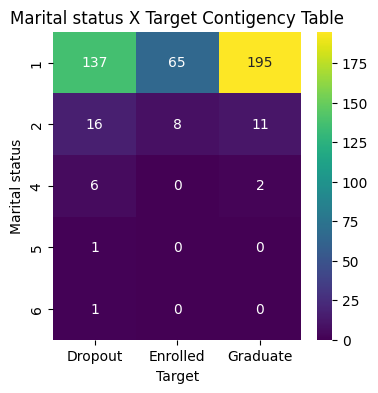

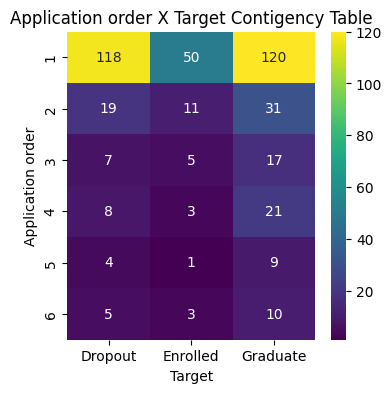

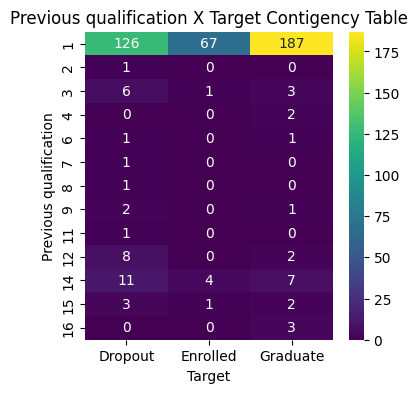

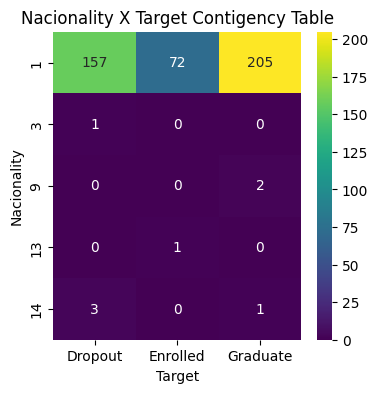

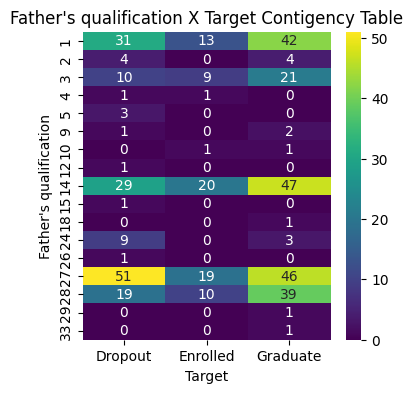

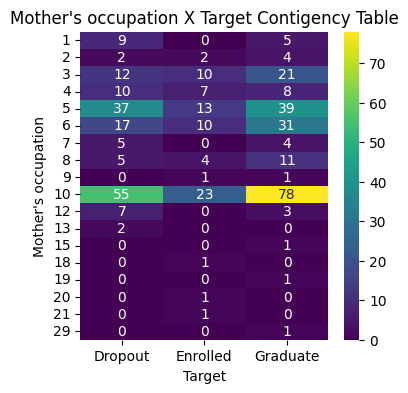

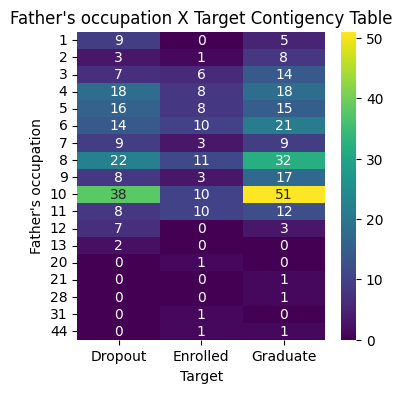

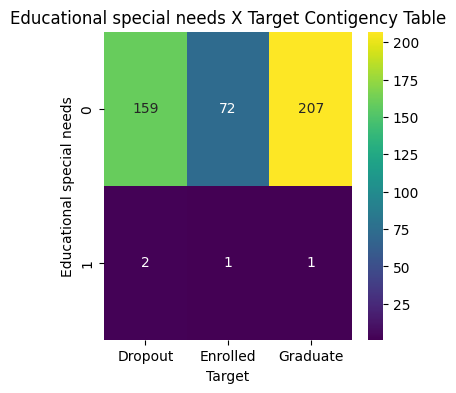

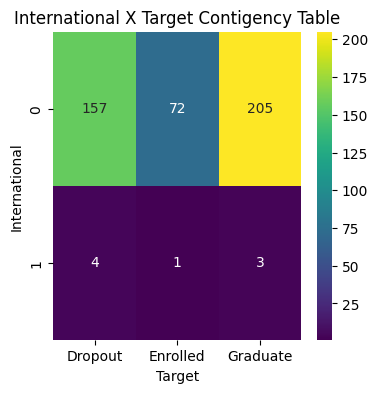

In [33]:
print('max nomr_chi2', max(v_cramer_list))
print(rejected)
print(confirmed)

for c in confirmed:
    chi2_hypotesis_test(df, c, 'Target')

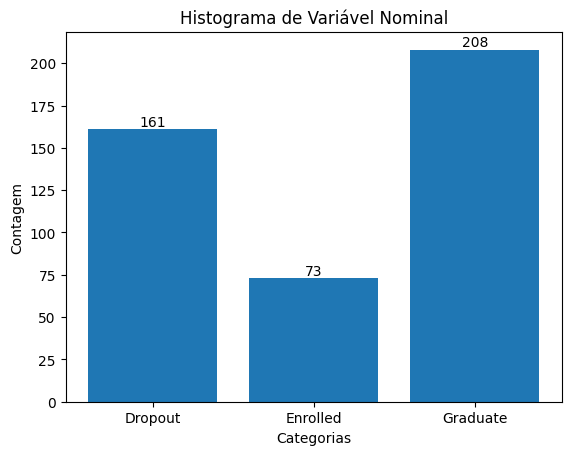

In [34]:
ordem_especifica = ['Dropout', 'Enrolled', 'Graduate']

contagem = {}
for categoria in df['Target']:
    contagem[categoria] = contagem.get(categoria, 0) + 1

# Reorganizar as categorias de acordo com a ordem específica
categorias_ordenadas = [categoria for categoria in ordem_especifica if categoria in contagem]
contagem_ordenada = [contagem[c] for c in categorias_ordenadas]

# Plotar o histograma
plt.bar(categorias_ordenadas, contagem_ordenada)

# Adicionar rótulos e título
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title('Histograma de Variável Nominal')

for i, count in enumerate(contagem_ordenada):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Exibir o gráfico
plt.show()


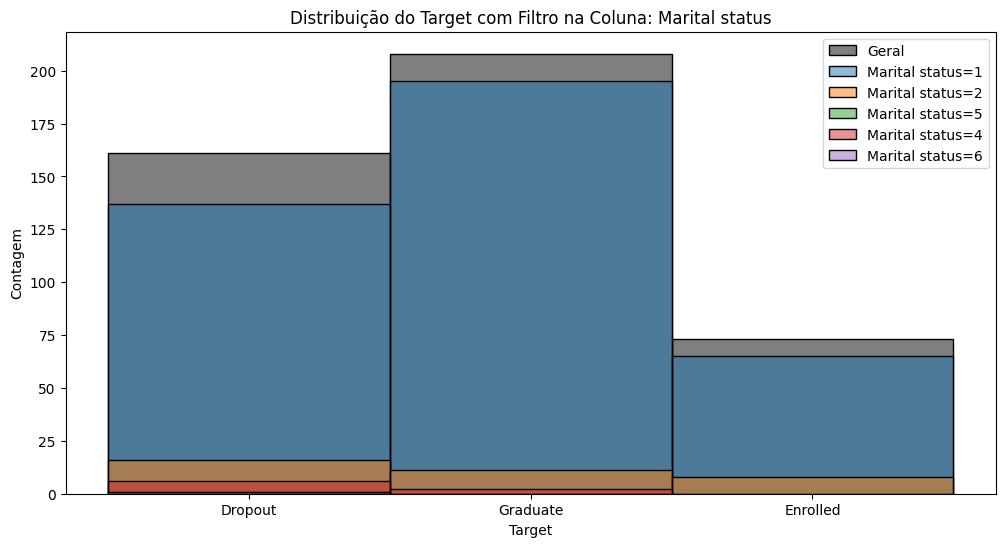

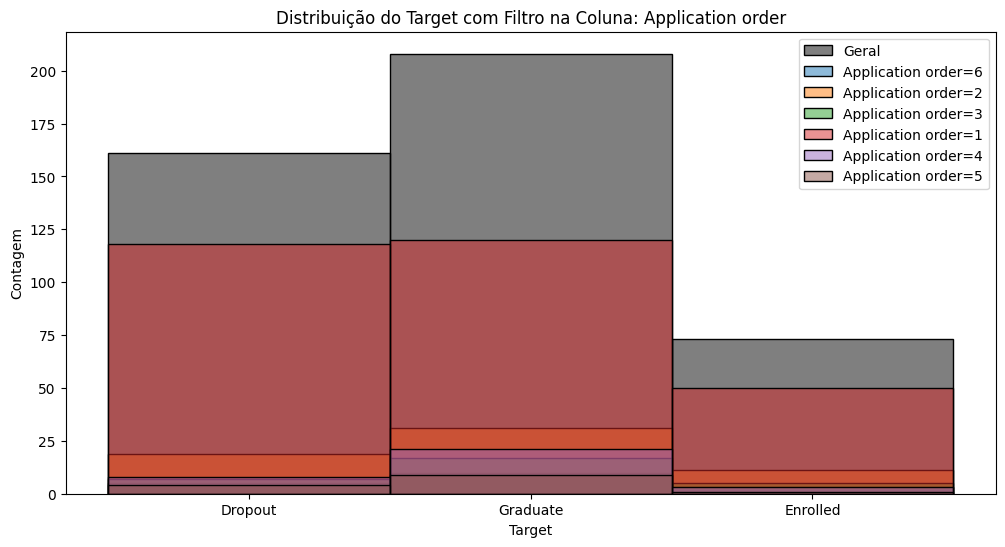

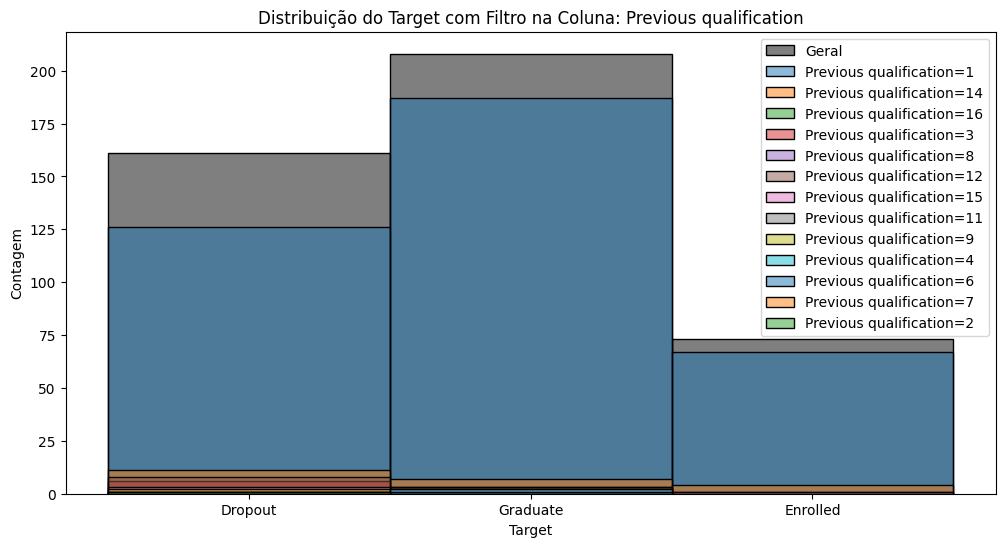

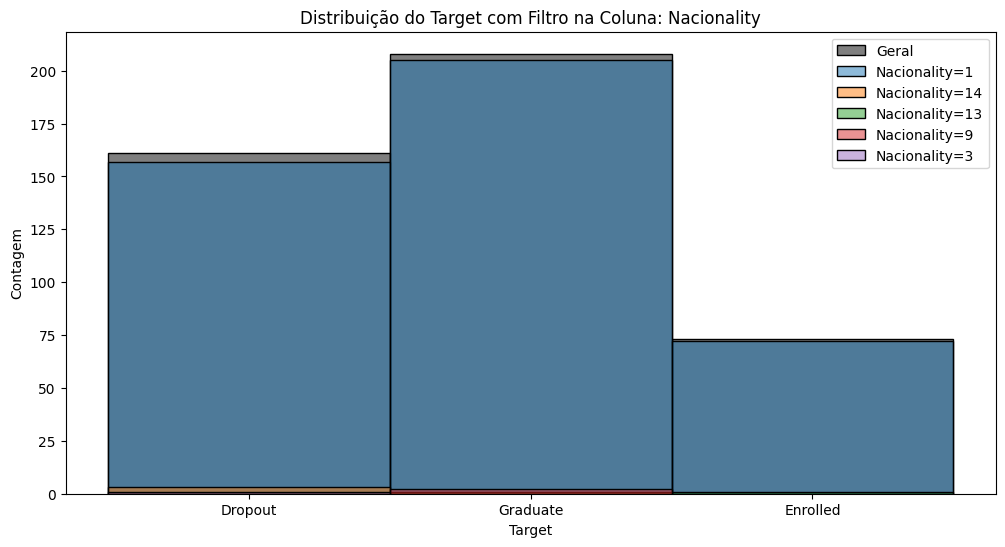

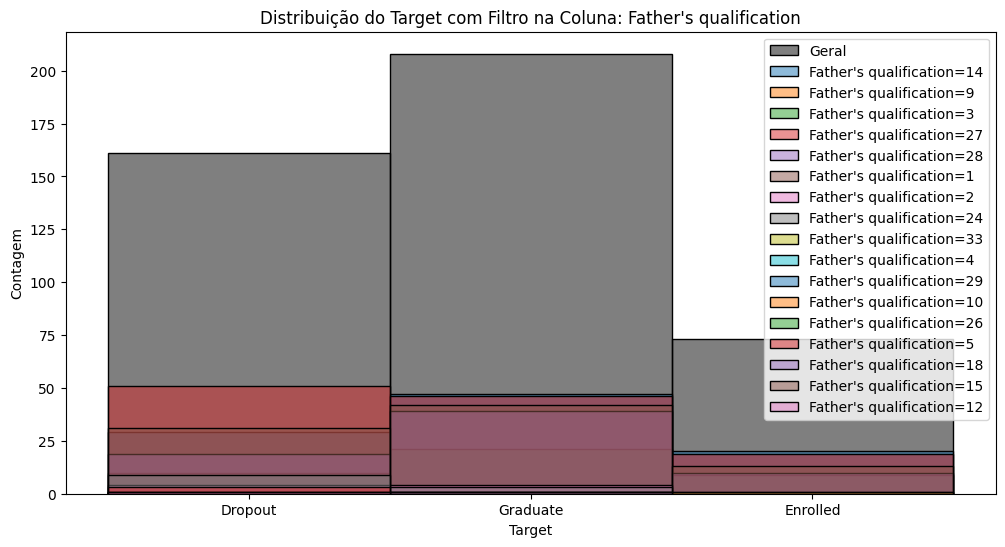

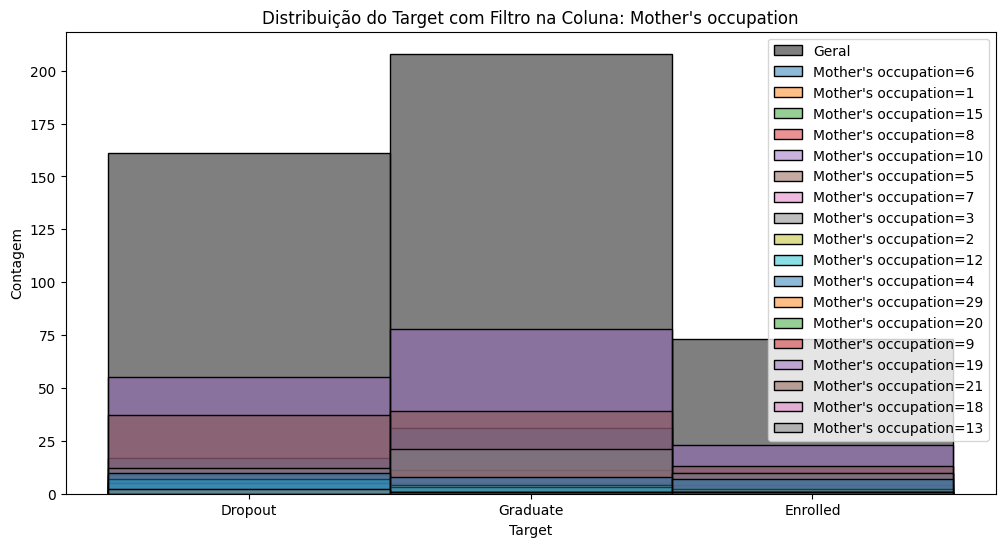

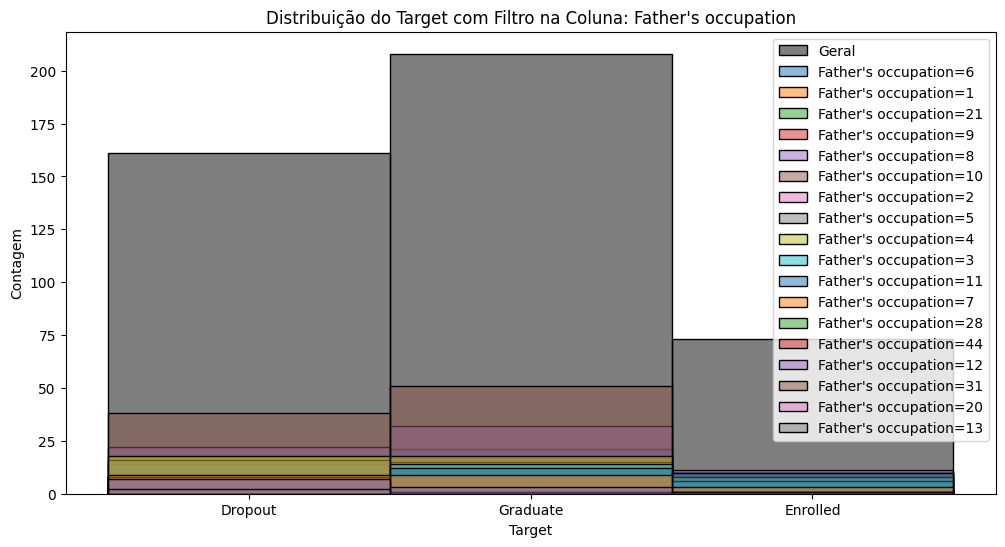

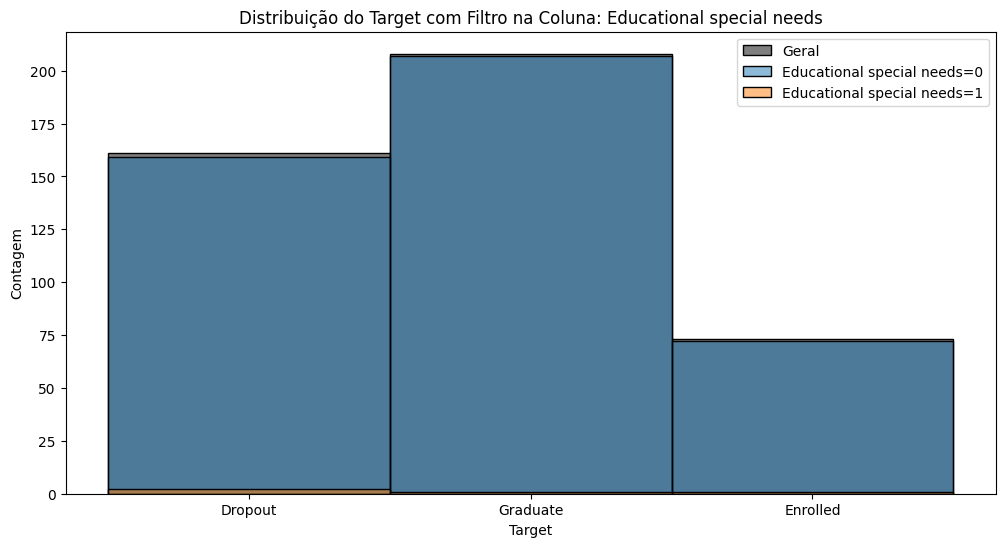

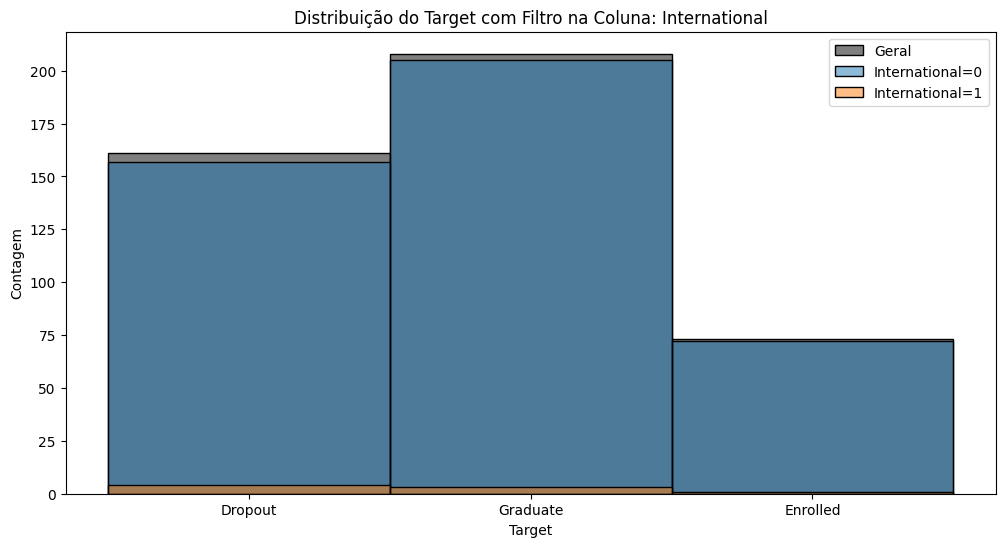

In [35]:
colunas = confirmed
target = 'Target'
for coluna in colunas:
    unique_values = df[coluna].unique()
    plt.figure(figsize=(12, 6))
    
    # Gráfico da distribuição geral como histograma
    sns.histplot(df[target], label='Geral', color='black', kde=False, bins=30, alpha=0.5)
    
    # Gráficos das distribuições condicionadas pelos valores da coluna
    for value in unique_values:
        subset = df[df[coluna] == value]
        sns.histplot(subset[target], label=f'{coluna}={value}', kde=False, bins=30, alpha=0.5)
    
    plt.title(f'Distribuição do Target com Filtro na Coluna: {coluna}')
    plt.xlabel('Target')
    plt.ylabel('Contagem')
    plt.legend()
    plt.show()

## Conclusão

Optamos por remover as colunas:

 1. 'Marital status';
 2. 'Previous qualification';
 3. 'Nacionality';
 4. "Father's qualification"; 
 5. "Father's occupation";
 6. "Mother's occupation"; 
 7. 'Educational special needs';
 8. 'International';
 9. 'Application order'

pois não agregarem muito para a nossa modelagem e para reduzir a dimensionalidade do problema.